<a href="https://colab.research.google.com/github/yuliyaosipava/Angular2/blob/master/ARIMA%2BGarch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product

In [5]:
from google.colab import files
uploaded = files.upload()

Saving OLA_ind9.xlsx to OLA_ind9.xlsx


In [7]:
# Загрузка данных

data = pd.read_excel('OLA_ind9.xlsx')
print(data.columns)

# Преобразование столбца дат в формат datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Фильтрация данных с 2016 года
data = data.loc[data['Date'] >= '2016-01']

# Установка столбца даты в качестве индекса
data.set_index('Date', inplace=True)

# Ваши данные серии
series = data['series1']

Index(['Date', 'series1'], dtype='object')


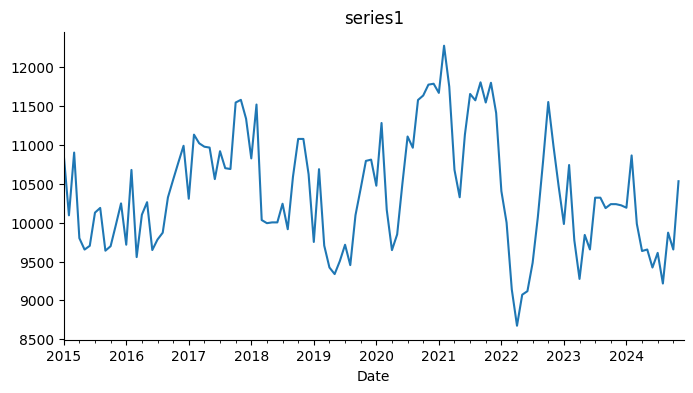

In [ ]:
# @title series1

from matplotlib import pyplot as plt
data['series1'].plot(kind='line', figsize=(8, 4), title='series1')
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
# Install the library if necessary
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 32.5 MB/s eta 0:00:00


In [9]:
# Import the library
from pmdarima.arima import auto_arima

# Build and fit the AutoARIMA model
model = auto_arima(series,
                   seasonal=True,
                   m=12,
                   suppress_warnings=True)
model.fit(series)

# Check the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  108
Model:             SARIMAX(3, 0, 3)x(2, 0, [], 12)   Log Likelihood                -801.357
Date:                             Mon, 10 Feb 2025   AIC                           1622.713
Time:                                     12:46:41   BIC                           1649.535
Sample:                                 01-01-2016   HQIC                          1633.588
                                      - 12-01-2024                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2780.1013   1881.502      1.478      0.140    -907.575    6467.778
ar.L1         -0.9475      0.183     -5.173      0.000      -1.306      -0.589
ar.L2          0.4849      0.197      2.456      0.014       0.098       0.872
ar.L3          0.7464      0.173      4.311      0.000       0.407       1.086
ma.L1          1.8629      0.234      7.948      0.000       1.404       2.322
ma.L2          1.1249      0.363      3.102      0.002       0.414       1.836
ma.L3          0.1502      0.186      0.806      0.420      -0.215       0.516
ar.S.L12       0.3879      0.138      2.802      0.005       0.117       0.659
ar.S.L24       0.2377      0.141      1.690      0.091      -0.038       0.513
sigma2      2.029e+05   4.38e+04      4.626      0.000    1.17e+05    2.89e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.80
Prob(Q):                              0.95   Prob(JB):                         0.41
Heteroskedasticity (H):               1.23   Skew:                            -0.31
Prob(H) (two-sided):                  0.53   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
# load pmdarima
import pmdarima
#automatically fit the optimal ARIMA model for given time series
arima_model_fitted = pmdarima.auto_arima(series.iloc[2016:])
# one-step out-of sample forecast
forecast = arima_model.predict(n_periods=1)[0]

# load statsmodels
import statsmodels.tsa.arima_model stm
# fit ARIMA model
model = stm.ARIMA(X, order=(3,1,2))
model_fit = model.fit()
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]

SyntaxError: invalid syntax (<ipython-input-13-4a7b4fdd3a6a>, line 9)

In [10]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 18.0 MB/s eta 0:00:00


In [21]:
import pandas as pd
import pmdarima
import arch
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Чтение файла
data = pd.read_excel('OLA_ind9.xlsx')
print(data.columns)

# Преобразование столбца дат в формат datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Удаление строк с NaT в дате
data = data.dropna(subset=['Date'])

# Фильтрация данных с 2016 года
data = data.loc[data['Date'] >= '2016-01-01']

# Установка столбца даты в качестве индекса
data.set_index('Date', inplace=True)

# Ваши данные серии
series = data['series1']

# Построение модели SARIMA
sarima_model = SARIMAX(series, order=(0, 1, 0), seasonal_order=(1, 0, 1, 12))
sarima_model_fitted = sarima_model.fit(disp=False)

# Печать сводки модели SARIMA
print(sarima_model_fitted.summary())

# Получение остатков модели SARIMA
sarima_residuals = sarima_model_fitted.resid

# Печать остатков
print(sarima_residuals)

# Подгонка модели GARCH(1,1) на остатках модели ARIMA
garch = arch.arch_model(sarima_residuals, p=1, q=1)
garch_fitted = garch.fit()

# Использование SARIMA для предсказания mu
params = sarima_model_fitted.params
predicted_mu = sarima_model_fitted.get_forecast(steps=1).predicted_mean.iloc[0]

# Использование GARCH для предсказания остатка
garch_forecast = garch_fitted.forecast(horizon=1)
predicted_et = garch_forecast.mean['h.1'].iloc[-1]

# Комбинация предсказаний обеих моделей: yt = mu + et
prediction = predicted_mu + predicted_et

# Печать длины серии
print(len(series))

# Печать предсказания
print(f'Predicted value: {prediction}')


Index(['Date', 'series1'], dtype='object')


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                              series1   No. Observations:                  108
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -799.120
Date:                              Mon, 10 Feb 2025   AIC                           1604.240
Time:                                      13:20:30   BIC                           1612.259
Sample:                                  01-01-2016   HQIC                          1607.491
                                       - 12-01-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9062      0.048     18.834      0.000       0.812       1.001
ma.S.L12      -0.61

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.198e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


108
Predicted value: 10374.708352474785


In [18]:
# Список моделей и их параметров
models = [
    {'order': (0,1,0), 'seasonal_order': (1,0,0,12), 'data': (series), 'description': 'SARIMA (0,1,0)(1,0,0,12)'}
]

# Словарь для хранения результатов
results_dict = {}

for idx, model_params in enumerate(models):
    print(f"\nМодель {idx+1}: {model_params['description']}")
    series = model_params['data']

    # Обучение модели
    model = SARIMAX(series,
                    order=model_params['order'],
                    seasonal_order=model_params['seasonal_order'],
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    results = model.fit()

    # Сохранение результатов
    results_dict[model_params['description']] = results

    # Вывод summary модели
    print(results.summary())

    # Прогнозирование
    forecast = results.get_forecast(steps=len(series))
    forecast_df = forecast.conf_int()
    forecast_df['forecast'] = forecast.predicted_mean
    forecast_df.index = test_data.index  # Обновляем индекс прогнозов, чтобы совпадал с тестовыми данными

    # Оценка модели
    mse = mean_squared_error(test_data, forecast_df['forecast'])
    mae = mean_absolute_error(test_data, forecast_df['forecast'])
    mape = mean_absolute_percentage_error(test_data, forecast_df['forecast'])

    print(f"\nОценка модели {model_params['description']}:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

    # Сравнение фактических и прогнозных значений
    comparison_df = pd.DataFrame({
        'Фактические значения': test_data,
        'Прогнозные значения': forecast_df['forecast']
    })
    #print("\nСравнение фактических и прогнозных значений:")
    #print(comparison_df)

    # Построение графика
    plt.figure(figsize=(12, 5))
    plt.plot(train_data.index, train_data, label='Обучающая выборка')
    plt.plot(test_data.index, test_data, label='Тестовая выборка', color='green')
    plt.plot(forecast_df.index, forecast_df['forecast'], label='Прогноз', color='red')
    plt.fill_between(forecast_df.index,
                     forecast_df.iloc[:, 0],
                     forecast_df.iloc[:, 1],
                     color='k', alpha=0.1)
    plt.title(f"Модель {model_params['description']}")
    plt.xlabel('Дата')
    plt.ylabel('Производство пива')
    plt.legend()
    plt.grid()
    plt.show()


Модель 1: SARIMA (0,1,0)(1,0,0,12)


NameError: name 'SARIMAX' is not defined

In [8]:
import pmdarima
import arch

# fit ARIMA on returns
arima_model_fitted = pmdarima.auto_arima(series)
p, d, q = arima_model.order
arima_residuals = arima_model.arima_res_.resid

# fit a GARCH(1,1) model on the residuals of the ARIMA model
garch = arch.arch_model(arima_residuals, p=1, q=1)
garch_fitted = garch.fit()

# Use ARIMA to predict mu
predicted_mu = arima_model.predict(n_periods=1)[0]
# Use GARCH to predict the residual
garch_forecast = garch_model.forecast(horizon=1)
predicted_et = garch_forecast.mean['h.1'].iloc[-1]
# Combine both models' output: yt = mu + et
prediction = predicted_mu + predicted_et

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

NameError: name 'arima_model' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Проверка диапазона дат
print("Даты в индексе от начала до конца:")
print(series.index.min(), "до", series.index.max())

# Установка корректных start_date и end_date в соответствии с индексом
start_date = '2015-01'
end_date = '2024-12'

# Обрезка данных для периода с 2015-01-01 по 2023-12-31
series = series.loc[start_date:end_date]

# Проверка монотонности индекса
print("Индекс является монотонным:", series.index.is_monotonic_increasing)

# Параметры более простых моделей SARIMA
models = [
    {
        'order': (1, 0, 0),
        'seasonal_order': (0, 0, 1, 12),
        'description': 'SARIMA (0,1,0)(1,0,0,12)'
    },
    {
        'order': (1, 0, 0),
        'seasonal_order': (0, 0, 2, 12),
        'description': 'SARIMA (1,0,0)(1,0,0,12)'
    }
]

# Период прогнозирования
forecast_steps = 12  # Прогноз на 12 месяцев (на 2024 год)
forecast_index = pd.date_range(start='2025-01', periods=forecast_steps, freq='MS')

# Цикл по моделям
for model_params in models:
    print(f"\nМодель: {model_params['description']}")

    # Обучение модели
    try:
        model = SARIMAX(
            series,
            order=model_params['order'],
            seasonal_order=model_params['seasonal_order'],
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        results = model.fit(disp=False)
    except Exception as e:
        print(f"Ошибка при обучении модели {model_params['description']}: {e}")
        continue

    # Вывод summary модели
    print(results.summary())

    # Получение смоделированных значений в исходном масштабе
    fitted_values = results.predict(start=series.index[1], end=series.index[-1], typ='levels')

    # Прогнозирование на 2024 год
    forecast = results.get_forecast(steps=forecast_steps)
    forecast_values = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()
    forecast_conf_int.index = forecast_index
    forecast_values.index = forecast_index

    # Построение графика
    plt.figure(figsize=(12, 6))
    plt.plot(series.index, series, label='Исходный ряд', color='blue')
    plt.plot(fitted_values.index, fitted_values, label='Смоделированный ряд', color='red', linestyle='--')
    plt.plot(forecast_values.index, forecast_values, label='Прогноз', color='green', linestyle='--')
    plt.fill_between(forecast_conf_int.index,
                     forecast_conf_int.iloc[:, 0],
                     forecast_conf_int.iloc[:, 1],
                     color='k', alpha=0.1, label='Доверительный интервал')
    plt.xlabel('Дата')
    plt.ylabel('Значения')
    plt.title(f"Модель: {model_params['description']}")
    plt.yticks(np.arange(10000, 16001, 2000))  # Изменение шкалы по оси y
    plt.legend()
    plt.grid(True)
    plt.show()

    # Вывод прогнозных значений
    print("Прогнозные значения на 2024 год:")
    forecast_df = pd.DataFrame({
        'Прогноз': forecast_values,
        'Нижний доверительный интервал': forecast_conf_int.iloc[:, 0],
        'Верхний доверительный интервал': forecast_conf_int.iloc[:, 1]
    }, index=forecast_index)
    print(forecast_df)

    # Сохранение прогнозных значений в Excel (опционально)
    forecast_df.to_excel(f"Forecast_{model_params['description']}.xlsx")
    print(f"Прогноз сохранен в файл 'Forecast_{model_params['description']}.xlsx'")

Даты в индексе от начала до конца:
nan до nan
Индекс является монотонным: True

Модель: SARIMA (0,1,0)(1,0,0,12)
Ошибка при обучении модели SARIMA (0,1,0)(1,0,0,12): index -1 is out of bounds for axis 0 with size 0

Модель: SARIMA (1,0,0)(1,0,0,12)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parame

Ошибка при обучении модели SARIMA (1,0,0)(1,0,0,12): index -1 is out of bounds for axis 0 with size 0


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
